In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Importing the data

In [32]:
data=pd.read_csv("abalone.csv")

In [33]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Exploring the data

In [34]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 1. we can observe there is very less deviation in the data
## 2. also the minimum value of height is 0 which is not possible, hence that must be a missing value

In [35]:
data.shape

(4177, 9)

In [36]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera Weight', 'Shell Weight', 'Rings'],
      dtype='object')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [37]:
#checking if there are any missing values in the data
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

In [38]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

##### There are no missing values and the data appears to have 4177 rows and 9 columns

In [39]:
#as age is defined using the rings and adding +1.5 years to it we will create a new age column
data['Age']=data['Rings']+1.5
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera Weight,Shell Weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [40]:
#checking value counts of each categorical column
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

### As each category has almost similar number of data points, we can say we have a balanced data

In [41]:
#dropping rings column
data.drop('Rings', axis = 1, inplace = True)

## Visualizing the data

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera Weight'}>],
       [<AxesSubplot:title={'center':'Shell Weight'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>]],
      dtype=object)

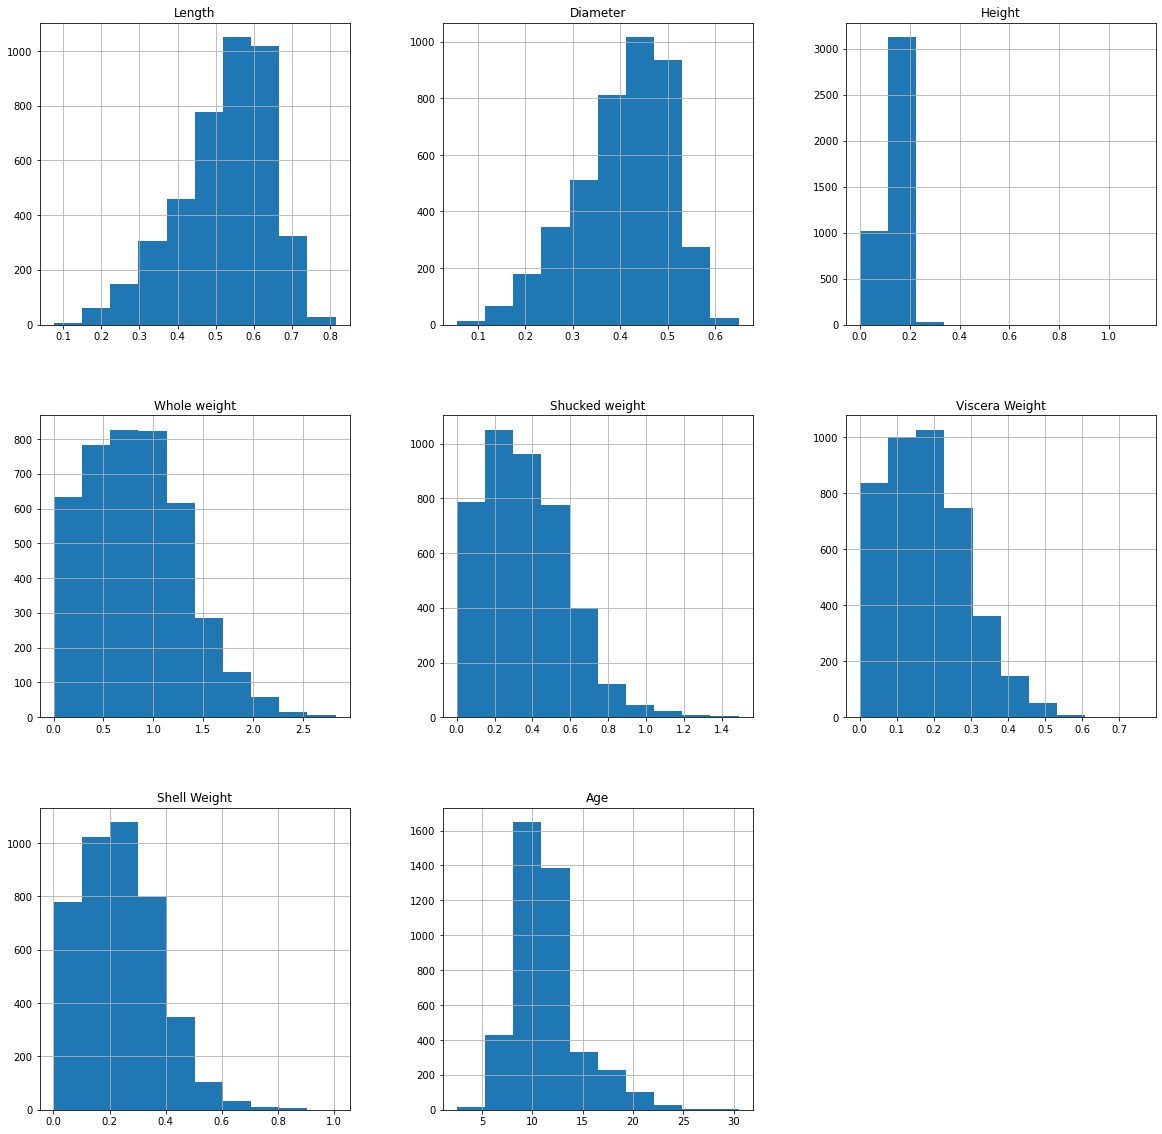

In [45]:
data.hist(figsize=(20,20))

## Height data has the highest skewness.

<AxesSubplot:>

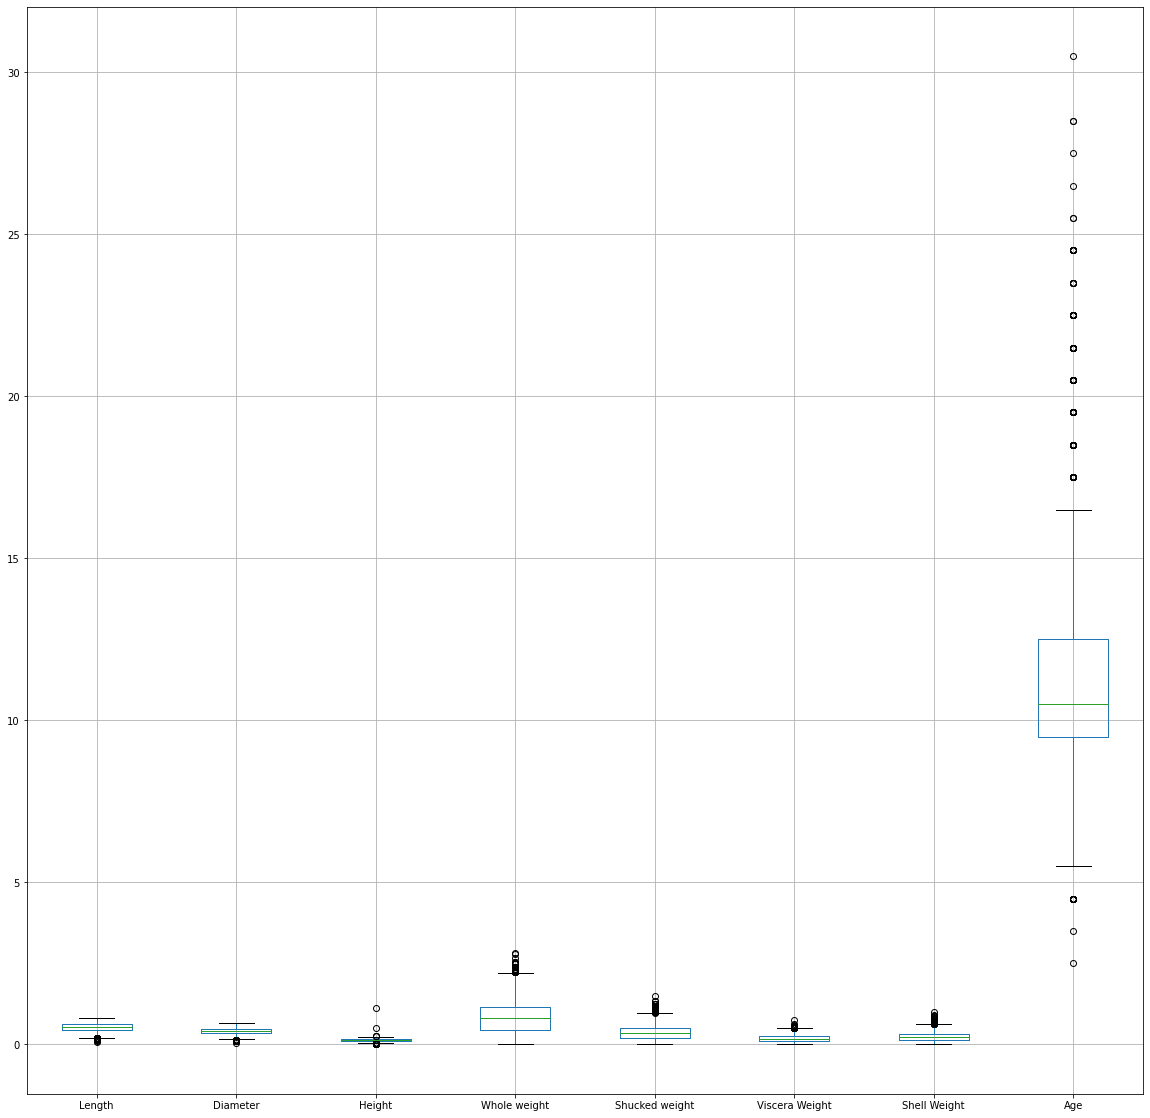

In [47]:
data.boxplot(figsize=(20,20))

### from this observe that the range of the each column is very different

<AxesSubplot:>

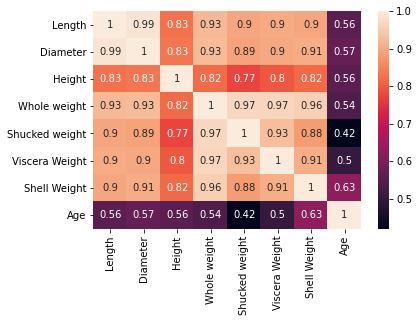

In [49]:
## finding if there is any correlation between the columns
sns.heatmap(data.corr(), annot=True)

## we find that all the numerical columns are highly correlated with each other except for Age column

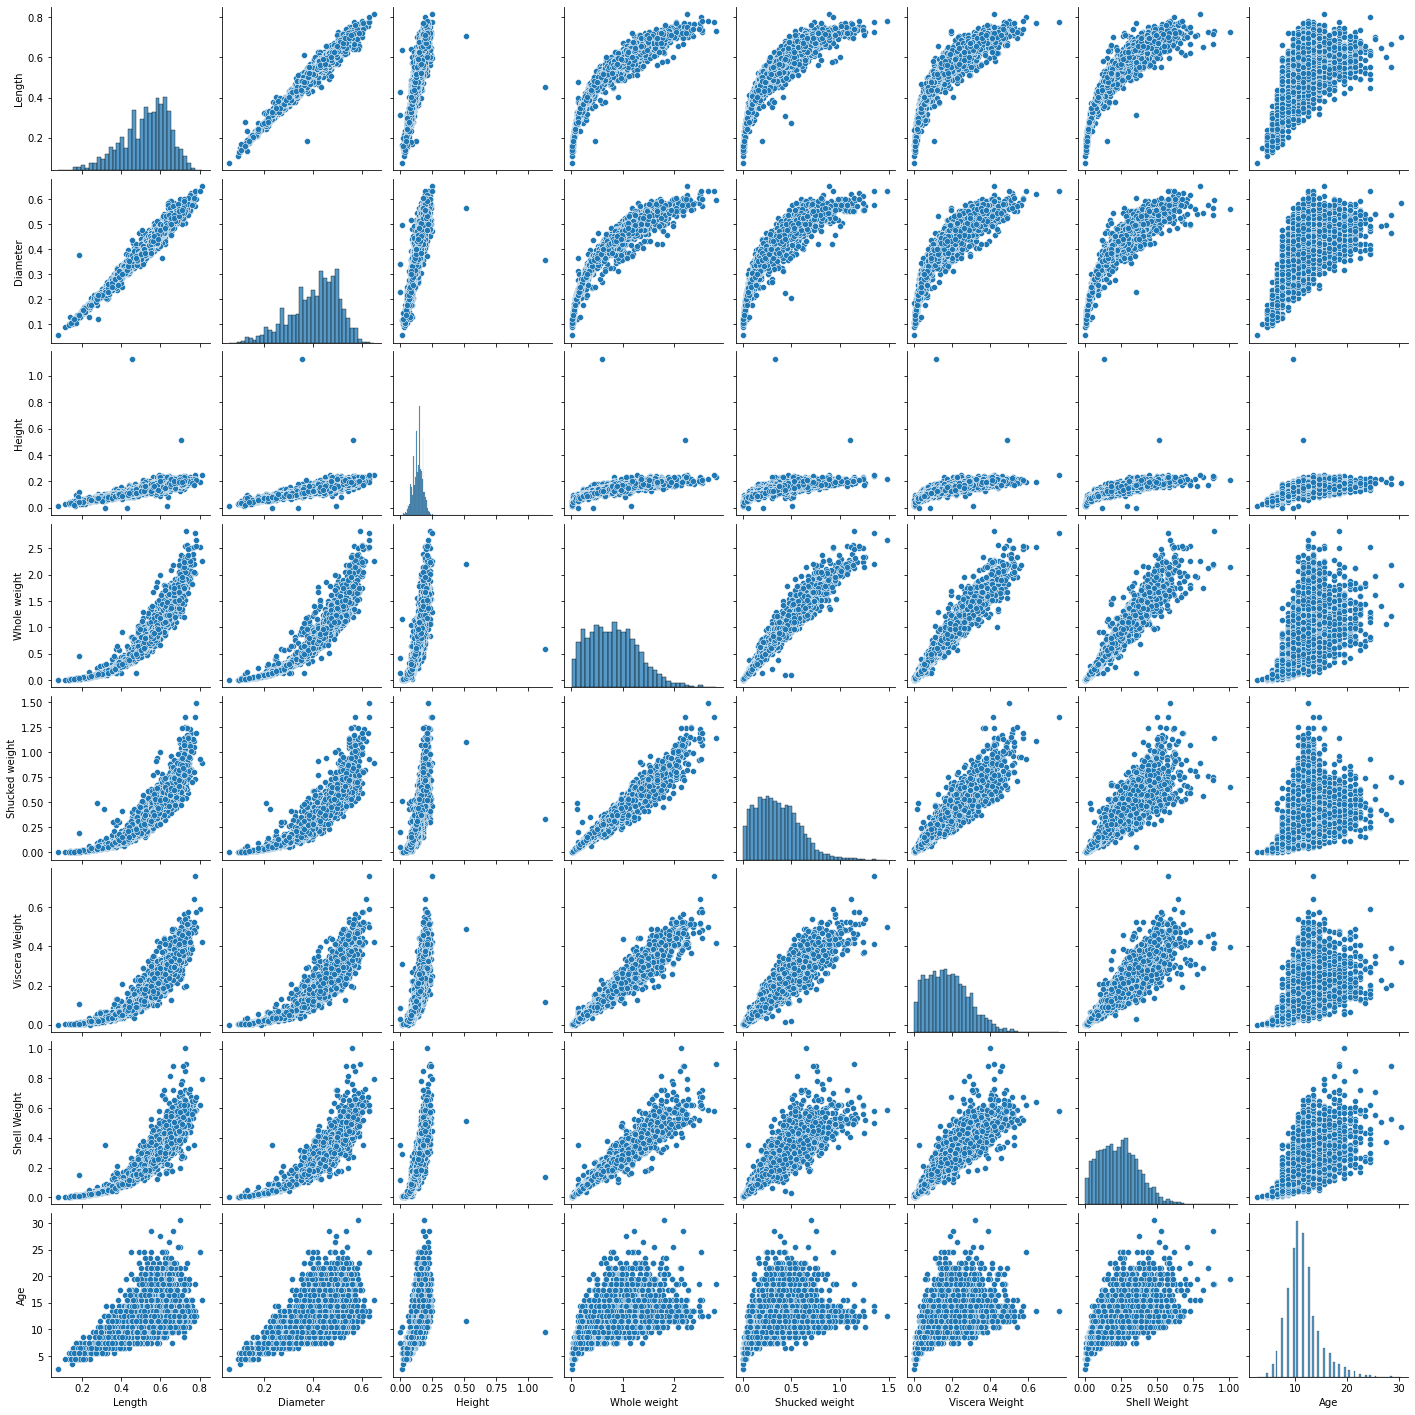

In [50]:
sns.pairplot(data)

#### This highly correlated data will lead to multi collinearity but as all columns are correlated we will observe what we can do further

### Handling outliers

In [51]:
def remove_outlier(col):
    q1,q2=col.quantile([0.25,0.75])
    IQR=q2-q1
    lr=q1-1.5*IQR
    ur=q2+1.5*IQR
    return lr,ur

In [53]:
lscore,uscore=remove_outlier(data['Length'])
data['Length']=np.where(data['Length']>uscore,uscore,data['Length'])
data['Length']=np.where(data['Length']<lscore,lscore,data['Length'])

In [56]:
lscore,uscore=remove_outlier(data['Diameter'])
data['Diameter']=np.where(data['Diameter']>uscore,uscore,data['Diameter'])
data['Diameter']=np.where(data['Diameter']<lscore,lscore,data['Diameter'])

In [57]:
lscore,uscore=remove_outlier(data['Height'])
data['Height']=np.where(data['Height']>uscore,uscore,data['Height'])
data['Height']=np.where(data['Height']<lscore,lscore,data['Height'])

In [58]:
lscore,uscore=remove_outlier(data['Whole weight'])
data['Whole weight']=np.where(data['Whole weight']>uscore,uscore,data['Whole weight'])
data['Whole weight']=np.where(data['Whole weight']<lscore,lscore,data['Whole weight'])

In [59]:
lscore,uscore=remove_outlier(data['Shucked weight'])
data['Shucked weight']=np.where(data['Shucked weight']>uscore,uscore,data['Shucked weight'])
data['Shucked weight']=np.where(data['Shucked weight']<lscore,lscore,data['Shucked weight'])

In [61]:
lscore,uscore=remove_outlier(data['Viscera Weight'])
data['Viscera Weight']=np.where(data['Viscera Weight']>uscore,uscore,data['Viscera Weight'])
data['Viscera Weight']=np.where(data['Viscera Weight']<lscore,lscore,data['Viscera Weight'])

In [62]:
lscore,uscore=remove_outlier(data['Shell Weight'])
data['Shell Weight']=np.where(data['Shell Weight']>uscore,uscore,data['Shell Weight'])
data['Shell Weight']=np.where(data['Shell Weight']<lscore,lscore,data['Shell Weight'])

<AxesSubplot:>

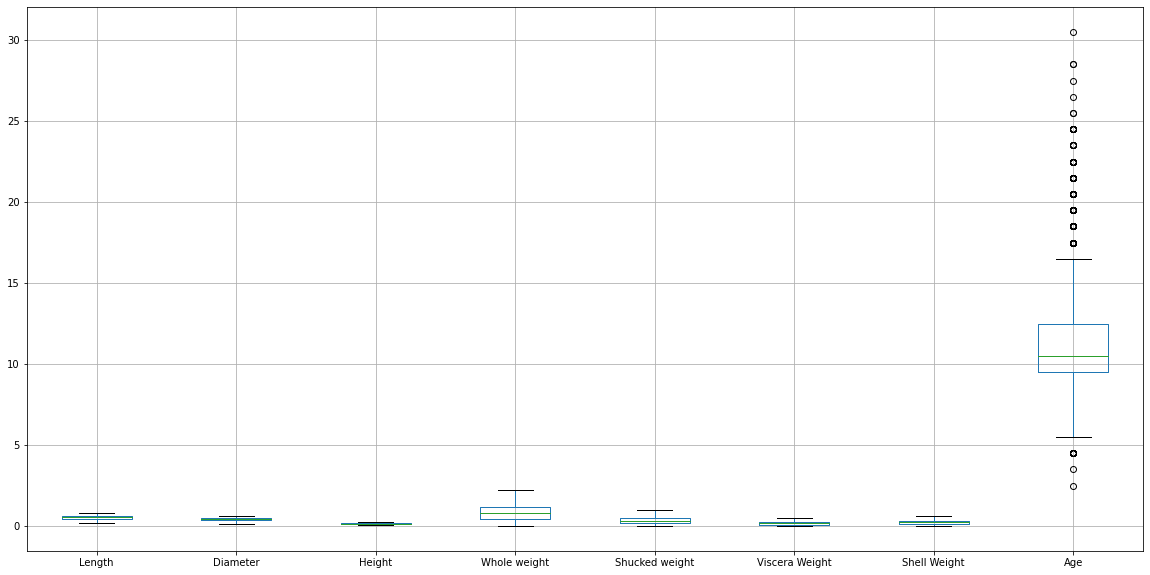

In [63]:
data.boxplot(figsize=(20,10))

## all outliers are now handled

In [64]:
## we now bring the numerical data in standard scalar format
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [65]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [66]:
data['Length']=sc.fit_transform(data[['Length']])
data['Diameter']=sc.fit_transform(data[['Diameter']])
data['Height']=sc.fit_transform(data[['Height']])
data['Whole weight']=sc.fit_transform(data[['Whole weight']])
data['Shucked weight']=sc.fit_transform(data[['Shucked weight']])
data['Viscera Weight']=sc.fit_transform(data[['Viscera Weight']])
data['Shell Weight']=sc.fit_transform(data[['Shell Weight']])

In [70]:
#converting the gender column to numerical value
data=pd.get_dummies(data)

In [71]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,-0.583117,-0.440884,-1.158093,-0.644740,-0.614985,-0.730304,-0.645184,16.5,0,0,1
1,-1.465694,-1.459762,-1.288751,-1.238208,-1.191637,-1.213890,-1.231390,8.5,0,0,1
2,0.047295,0.119499,-0.112828,-0.309436,-0.467362,-0.357253,-0.205531,10.5,1,0,0
3,-0.709200,-0.440884,-0.374145,-0.640626,-0.656504,-0.610559,-0.608547,11.5,0,0,1
4,-1.633804,-1.561650,-1.550067,-1.280378,-1.237770,-1.296790,-1.341303,8.5,0,1,0


In [72]:
data.drop(columns='Sex_I',axis=1,inplace=True)

In [73]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_M
0,-0.583117,-0.440884,-1.158093,-0.644740,-0.614985,-0.730304,-0.645184,16.5,0,1
1,-1.465694,-1.459762,-1.288751,-1.238208,-1.191637,-1.213890,-1.231390,8.5,0,1
2,0.047295,0.119499,-0.112828,-0.309436,-0.467362,-0.357253,-0.205531,10.5,1,0
3,-0.709200,-0.440884,-0.374145,-0.640626,-0.656504,-0.610559,-0.608547,11.5,0,1
4,-1.633804,-1.561650,-1.550067,-1.280378,-1.237770,-1.296790,-1.341303,8.5,0,0


# Now our data is ready for fitting to a model

##

## As age is a continuous data we will have to move forward with regression.

## Using various regression models for finding the best predictors

In [91]:
#dividing the data in dependent and independent variables
X=data.drop(columns="Age",axis=1)
y=data["Age"]

In [80]:
X.shape

(4177, 9)

In [81]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera Weight,Shell Weight,Sex_F,Sex_M
0,-0.583117,-0.440884,-1.158093,-0.644740,-0.614985,-0.730304,-0.645184,0,1
1,-1.465694,-1.459762,-1.288751,-1.238208,-1.191637,-1.213890,-1.231390,0,1
2,0.047295,0.119499,-0.112828,-0.309436,-0.467362,-0.357253,-0.205531,1,0
3,-0.709200,-0.440884,-0.374145,-0.640626,-0.656504,-0.610559,-0.608547,0,1
4,-1.633804,-1.561650,-1.550067,-1.280378,-1.237770,-1.296790,-1.341303,0,0


In [92]:
y.shape

(4177,)

In [93]:
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [98]:
#splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 100)

In [100]:
#performing linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [101]:
model.score(X_test,y_test)

0.553006266704392

In [102]:
model.score(X_train,y_train)

0.5452995517701877

In [104]:
y_pred=model.predict(X_test)

In [106]:
from sklearn import metrics
print("MAE: "+str(metrics.mean_absolute_error(y_test,y_pred)))  
print("MSE: "+str(metrics.mean_squared_error(y_test,y_pred)))
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
from sklearn.metrics import r2_score
print("R2 score: "+str(r2_score(y_test,y_pred)))

MAE: 1.5489817259272214
MSE: 4.627159276555213
RMSE: 2.151083279781425
R2 score: 0.553006266704392


## these model score is really less so we go for another regression method.

In [107]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_train,y_train)

Ridge()

In [108]:
model.score(X_test,y_test)

0.5534281679639661

In [109]:
y_pred=model.predict(X_test)

In [110]:
from sklearn import metrics
print("MAE: "+str(metrics.mean_absolute_error(y_test,y_pred)))  
print("MSE: "+str(metrics.mean_squared_error(y_test,y_pred)))
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
from sklearn.metrics import r2_score
print("R2 score: "+str(r2_score(y_test,y_pred)))

MAE: 1.54812577413832
MSE: 4.622791867838685
RMSE: 2.15006787517015
R2 score: 0.5534281679639661


In [111]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(X_train,y_train)

Lasso()

In [112]:
model.score(X_test,y_test)

0.3020185106261085

In [113]:
y_pred=model.predict(X_test)

In [114]:
from sklearn import metrics
print("MAE: "+str(metrics.mean_absolute_error(y_test,y_pred)))  
print("MSE: "+str(metrics.mean_squared_error(y_test,y_pred)))
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
from sklearn.metrics import r2_score
print("R2 score: "+str(r2_score(y_test,y_pred)))

MAE: 1.9353695730595366
MSE: 7.225317231202355
RMSE: 2.68799502068035
R2 score: 0.3020185106261085


In [115]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [116]:
model.score(X_test,y_test)

0.23376896946750592

In [117]:
y_pred=model.predict(X_test)

In [118]:
from sklearn import metrics
print("MAE: "+str(metrics.mean_absolute_error(y_test,y_pred)))  
print("MSE: "+str(metrics.mean_squared_error(y_test,y_pred)))
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
from sklearn.metrics import r2_score
print("R2 score: "+str(r2_score(y_test,y_pred)))

MAE: 1.9461722488038278
MSE: 7.931818181818182
RMSE: 2.816348377210849
R2 score: 0.23376896946750592


In [119]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [120]:
model.score(X_test,y_test)

0.5566188625453781

In [121]:
y_pred=model.predict(X_test)

In [122]:
from sklearn import metrics
print("MAE: "+str(metrics.mean_absolute_error(y_test,y_pred)))  
print("MSE: "+str(metrics.mean_squared_error(y_test,y_pred)))
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
from sklearn.metrics import r2_score
print("R2 score: "+str(r2_score(y_test,y_pred)))

MAE: 1.4906979767490198
MSE: 4.58976265303922
RMSE: 2.142373135809731
R2 score: 0.5566188625453781


In [123]:
from sklearn.svm import SVR
model=SVR()
model.fit(X_train,y_train)

SVR()

In [124]:
model.score(X_test,y_test)

0.5517707875751158

In [125]:
y_pred=model.predict(X_test)

In [126]:
from sklearn import metrics
print("MAE: "+str(metrics.mean_absolute_error(y_test,y_pred)))  
print("MSE: "+str(metrics.mean_squared_error(y_test,y_pred)))
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
from sklearn.metrics import r2_score
print("R2 score: "+str(r2_score(y_test,y_pred)))

MAE: 1.4404800595621352
MSE: 4.6399486252377375
RMSE: 2.1540539977534774
R2 score: 0.5517707875751158


In [127]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(X_train,y_train)

KNeighborsRegressor()

In [128]:
model.score(X_test,y_test)

0.5040517367208199

In [129]:
y_pred=model.predict(X_test)

In [130]:
from sklearn import metrics
print("MAE: "+str(metrics.mean_absolute_error(y_test,y_pred)))  
print("MSE: "+str(metrics.mean_squared_error(y_test,y_pred)))
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
from sklearn.metrics import r2_score
print("R2 score: "+str(r2_score(y_test,y_pred)))

MAE: 1.5787081339712918
MSE: 5.133923444976077
RMSE: 2.2658162866781755
R2 score: 0.5040517367208199


In [131]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [132]:
model.score(X_test,y_test)

0.5443077655946604

# We observe from the above model scores for different models the R2 score is very less. We can conclude this is due to multi collinearity or the data is very limited.

##

## We can try performing cross validation to rectify this issue

In [133]:
from sklearn import svm

In [134]:
from sklearn.model_selection import cross_val_score

In [145]:
reg = svm.SVR(kernel='linear')  # lr = LinearRegression()

In [148]:
score = cross_val_score(reg,X,y,cv=5,scoring='r2')

In [149]:
score

array([0.31218002, 0.39268944, 0.48657661, 0.54840436, 0.48977809])

In [159]:
from sklearn.model_selection import ShuffleSplit
n_splits = X.shape[0] #no of rows 
cv = ShuffleSplit(n_splits=5 ,test_size = 0.2,random_state = 0)
(cross_val_score(reg,X,y,cv=cv)).mean()

0.5285636253745846

In [155]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3,random_state = 100,shuffle = True)

In [156]:
for train_index,test_index in skf.split(X,y):
    X_train,y_train = X[train_index],y[train_index]
    X_test,y_test = X[test_index],y[test_index]

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.